In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**After importing essential libraries we will use in this analysis, let's load the data**

In [2]:
df = pd.read_csv(r"C:\Users\satya\Downloads\QR - JP Morgan\Nat_Gas.csv")

**Let's see how our data looks like.**

In [3]:
df

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


**Before plotting visuals, we will do these two tasks:**

*1. Convert 'Dates' column to datetime format and coerce any invalid entries to NaT*

*2. Ensure 'Prices' column is in float format for numerical analysis and plotting*

In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce') 
df['Prices'] = df['Prices'].astype(float)

C:\Users\satya\AppData\Local\Temp\ipykernel_11672\3808234697.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')  # force conversion


**Now it is plotting time, so let us plot some impactful visuals.**

**Plot 1: Natural Gas Prices Over Time**

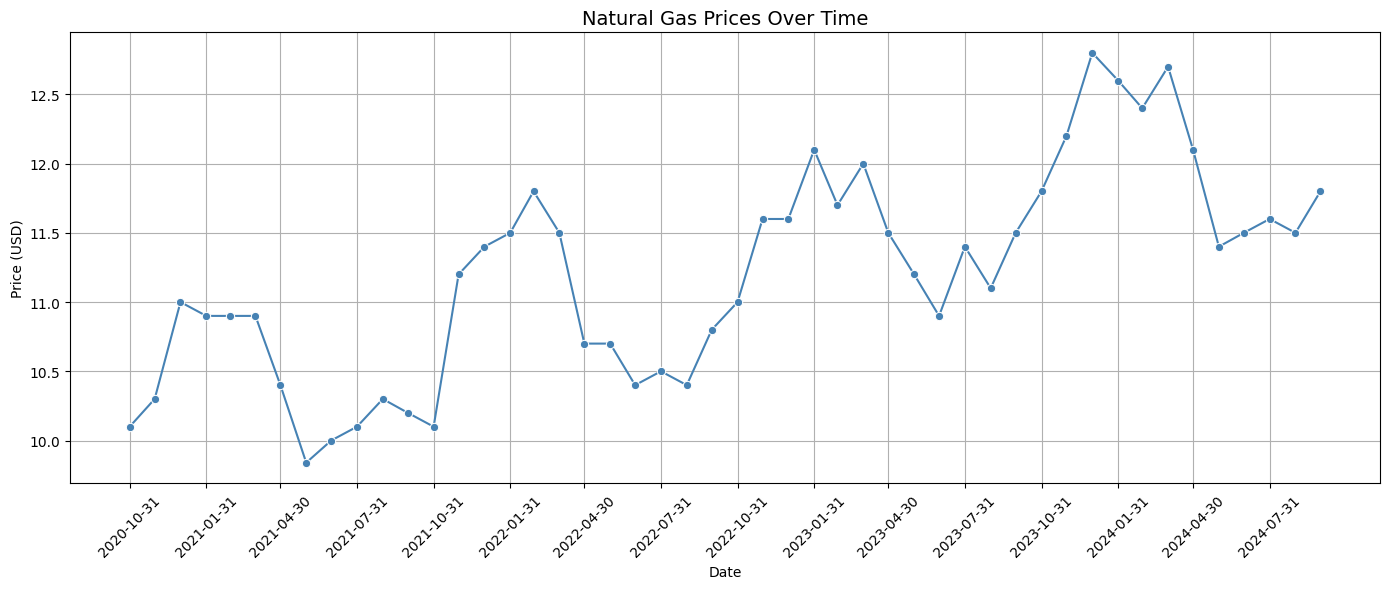

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Dates', y='Prices', data=df, marker='o', color='steelblue')
plt.title("Natural Gas Prices Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)

tick_positions = df['Dates'][::3]
plt.gca().set_xticks(tick_positions)

plt.tight_layout()
plt.show()

**Plot 2: Price Distribution by Month**

C:\Users\satya\AppData\Local\Temp\ipykernel_11672\103103783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Prices', data=df, palette='coolwarm',


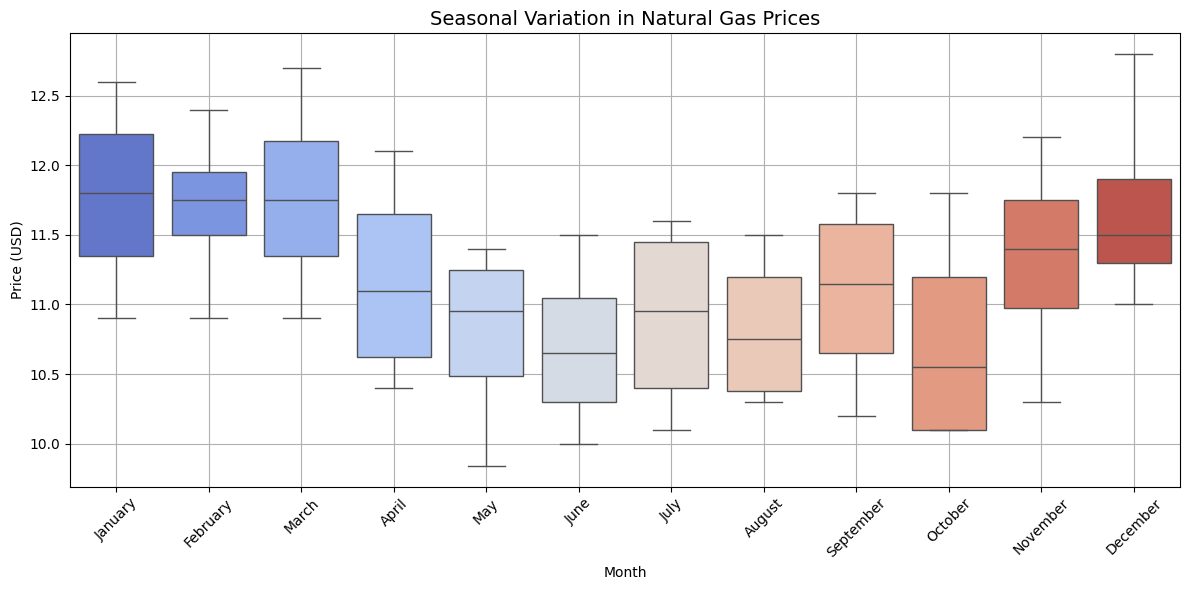

In [6]:
df['Month'] = df['Dates'].dt.month_name()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Prices', data=df, palette='coolwarm',
            order=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'])
plt.title("Seasonal Variation in Natural Gas Prices", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Plot 3: Average Price by Year**

C:\Users\satya\AppData\Local\Temp\ipykernel_11672\3858860082.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Prices', data=yearly_avg, palette='viridis')


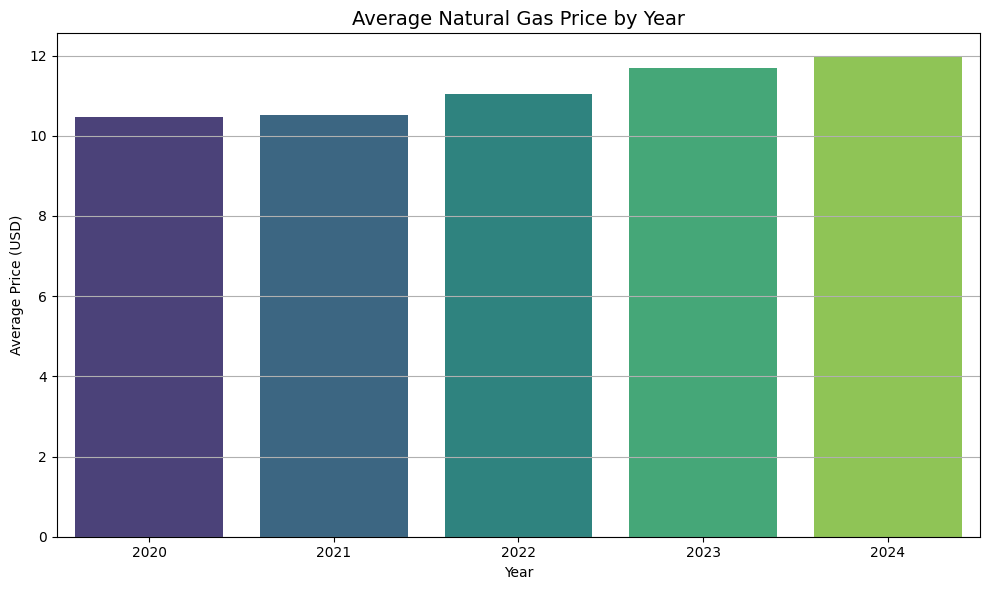

In [7]:
df['Year'] = df['Dates'].dt.year
yearly_avg = df.groupby('Year')['Prices'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Prices', data=yearly_avg, palette='viridis')
plt.title("Average Natural Gas Price by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Plot 4: Distribution of Natural Gas Prices**

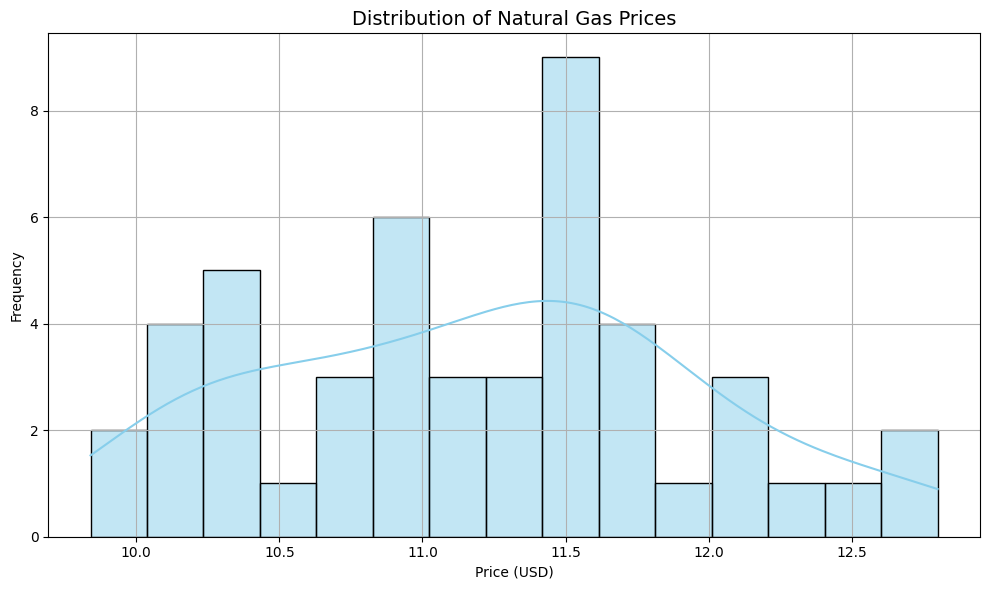

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Prices'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Natural Gas Prices", fontsize=14)
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

**Plot 5: Month-on-Month Price Change**

C:\Users\satya\AppData\Local\Temp\ipykernel_11672\852718100.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Date_Label', y='Price_Change', data=df_change, palette='viridis')


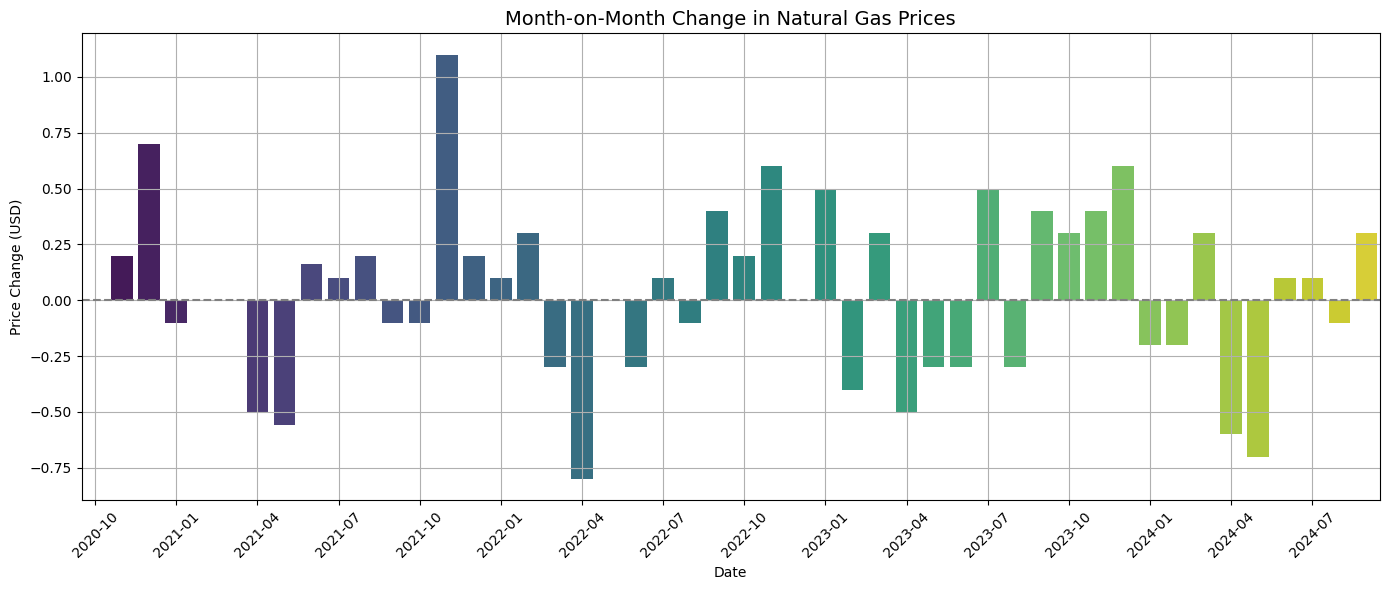

In [ ]:
df_change = df.copy()
df_change['Price_Change'] = df_change['Prices'].diff()
df_change['Date_Label'] = df_change['Dates'].dt.strftime('%Y-%m')


plt.figure(figsize=(14, 6))
sns.barplot(x='Date_Label', y='Price_Change', data=df_change, palette='viridis')

plt.title("Month-on-Month Change in Natural Gas Prices", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price Change (USD)")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)

tick_positions = range(0, len(df_change), 3)
plt.xticks(tick_positions, df_change['Date_Label'].iloc[tick_positions], rotation=45)

plt.tight_layout()
plt.show()

**Conclusion**

This analysis of monthly natural gas prices from October 2020 to September 2024 reveals several key insights relevant to long-term procurement and storage planning.

*1. Trend Overview*

Natural gas prices have exhibited a steady upward trajectory over the four-year period, with notable acceleration beginning in early 2023. This sustained increase suggests underlying market pressures such as rising demand, constrained supply, or geopolitical influences.

*2. Seasonal Behaviour*

A clear seasonal pattern is evident, with prices typically peaking during winter months (November through February). This aligns with increased consumption for heating and energy generation. Summer months tend to show more stable or slightly reduced pricing, indicating cyclical demand behavior.

*3. Year-on-Year Growth*

Average annual prices have increased consistently, with 2023 and 2024 showing the highest levels. This trend supports the hypothesis of a structural shift in market pricing, potentially driven by macroeconomic factors or long-term supply chain adjustments.

*4. Volatility and Distribution*

Month-on-month price changes remain within a moderate range, typically ±1 USD, with occasional spikes. The distribution of prices is unimodal and slightly right-skewed, indicating a concentration of values in the mid-to-high range with fewer low-price outliers.

*5. Forecasting Capability*

A polynomial regression model was developed to extrapolate prices for an additional 12 months beyond the available data. This model captures both trend and seasonality, providing indicative pricing for future contracts. The extrapolated values maintain continuity with historical patterns and offer a reliable reference for strategic planning.